In [1]:
import os
import importlib
import warnings
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

from utils.data import DataTree
import snapfish2 as sf
importlib.reload(sf)

<module 'snapfish2' from '/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/__init__.py'>

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
out_dire = "../123ACElog/032125"
dtree = DataTree("../data")

In [4]:
reps = ["rep1", "rep2", "rep3"]
loader = sf.pp.FOF_CT_Loader({
    c: dtree["takei_science_2021", "25Kb", c] for c in reps
}, voxel_ratio={"X": 103, "Y": 103, "Z": 250}, obs_cols_add=["Cell_ID"])
celldfs = sf.pp.FOF_CT_Loader({
    c: dtree["takei_science_2021", "cell_type", c] for c in reps
}).read_data()

## Differential TAD demo

In [6]:
chr_id = "chr3"
adata = loader.create_adata(chr_id)
sf.pp.add_cell_type(adata, celldfs, "Cell_ID", "cluster label")
celltype_dict = {1:'Pvalb', 2:'Vip', 3:'Ndnf', 4:'Sst', 5:'Astro',
                 6:'Micro', 7:'Endo', 8:'Oligo', 9:'Ex'}
adata.obs["cell_type"] = adata.obs["cluster label"].map(celltype_dict)

/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/utils/eval.py:22: ImplicitModificationWarning: Setting element `.varp['raw_var_X']` of view, initializing view as actual.
  adata.varp[f"raw_var_{v}"] = med_sq[i]
/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/utils/eval.py:22: ImplicitModificationWarning: Setting element `.varp['raw_var_X']` of view, initializing view as actual.
  adata.varp[f"raw_var_{v}"] = med_sq[i]


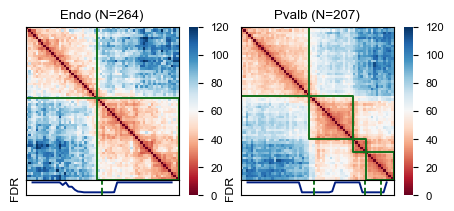

In [6]:
adata1 = adata[adata.obs["cell_type"] == "Endo"]
adata2 = adata[adata.obs["cell_type"] == "Pvalb"]
caller = sf.tl.TADCaller(tree=False, window=4e5)
fig, axes = plt.subplots(1, 2, figsize=(4.3, 2))
sf.pl.domain_boundary(adata1, caller, ax=axes[0], vmax=120, 
                      title=f"Endo (N={adata1.shape[0]})")
sf.pl.domain_boundary(adata2, caller, ax=axes[1], vmax=120, 
                      title=f"Pvalb (N={adata2.shape[0]})")
fig.savefig(os.path.join(out_dire, "Endo_Pvalb_TADs.pdf"), bbox_inches="tight")

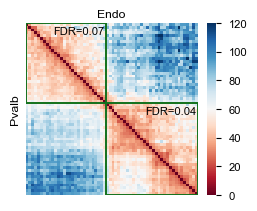

In [7]:
caller = sf.tl.TADCaller(tree=False, window=4e5)
res = caller.to_bedpe(caller.call_tads(adata1))
diff = sf.tl.DiffRegion(adata1, adata2)
res_diff = diff.diff_region(res)

fig, ax = plt.subplots(figsize=(2.5, 2))
sf.pl.pairwise_heatmap(
    X1=sf.pp.median_pdist(adata1, inplace=False),
    X2=sf.pp.median_pdist(adata2, inplace=False),
    x="Endo", y="Pvalb", ax=ax, vmax=120
)
sf.pl.add_domain_fdr(ax, res_diff)
fig.savefig(os.path.join(out_dire, "Endo_Pvalb_dTAD.pdf"), bbox_inches="tight")

/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/utils/eval.py:22: ImplicitModificationWarning: Setting element `.varp['raw_var_X']` of view, initializing view as actual.
  adata.varp[f"raw_var_{v}"] = med_sq[i]


/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/utils/eval.py:22: ImplicitModificationWarning: Setting element `.varp['raw_var_X']` of view, initializing view as actual.
  adata.varp[f"raw_var_{v}"] = med_sq[i]


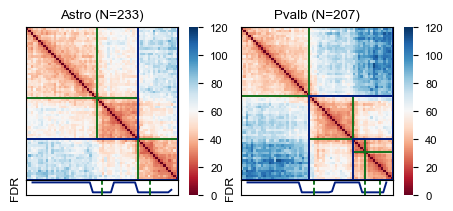

In [8]:
adata1 = adata[adata.obs["cell_type"] == "Astro"]
adata2 = adata[adata.obs["cell_type"] == "Pvalb"]
caller = sf.tl.TADCaller(tree=True, window=4e5)
fig, axes = plt.subplots(1, 2, figsize=(4.3, 2))
sf.pl.domain_boundary(adata1, caller, ax=axes[0], vmax=120, 
                      title=f"Astro (N={adata1.shape[0]})")
sf.pl.domain_boundary(adata2, caller, ax=axes[1], vmax=120, 
                      title=f"Pvalb (N={adata2.shape[0]})")
fig.savefig(os.path.join(out_dire, "Astro_Pvalb_TADs.pdf"), bbox_inches="tight")

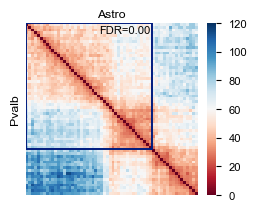

In [9]:
caller = sf.tl.TADCaller(tree=True, window=4e5)
res = caller.to_bedpe(caller.call_tads(adata1))
diff = sf.tl.DiffRegion(adata1, adata2)
res_diff = diff.diff_region(res[res["level"]==1])

fig, ax = plt.subplots(figsize=(2.5, 2))
sf.pl.pairwise_heatmap(
    X1=sf.pp.median_pdist(adata1, inplace=False),
    X2=sf.pp.median_pdist(adata2, inplace=False),
    x="Astro", y="Pvalb", ax=ax, vmax=120
)
sf.pl.add_domain_fdr(ax, res_diff)
fig.savefig(os.path.join(out_dire, "Astro_Pvalb_dTAD.pdf"), bbox_inches="tight")

## Control type I error rate

In [ ]:
loader1 = sf.pp.FOF_CT_Loader()

## Differential loop demo

In [7]:
oadata = adata[adata.obs["cell_type"] == "Ex"]
sf.pp.filter_normalize(oadata)
loop = sf.tl.LoopCaller()
loop_res = loop.call_loops(oadata)
loop_df = loop.to_bedpe(loop_res, oadata)

/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/utils/eval.py:22: ImplicitModificationWarning: Setting element `.varp['raw_var_X']` of view, initializing view as actual.
  adata.varp[f"raw_var_{v}"] = med_sq[i]


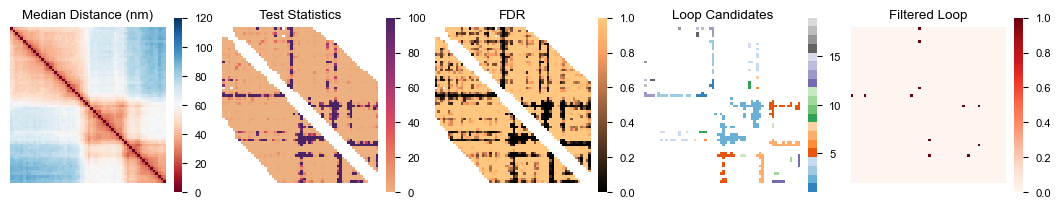

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(10.5, 2))
sf.pl.pairwise_heatmap(sf.pp.median_pdist(oadata, inplace=False), ax=axes[0], vmax=120, title="Median Distance (nm)")
sf.pl.pairwise_heatmap(loop_res["stat"], ax=axes[1], cmap="flare", vmin=0, vmax=1e2, title="Test Statistics")
sf.pl.pairwise_heatmap(loop_res["fdr"], ax=axes[2], cmap="copper", vmax=1, title="FDR")
sf.pl.pairwise_heatmap(loop_res["label"], ax=axes[3], cmap="tab20c", title="Loop Candidates")
sf.pl.pairwise_heatmap(loop_res["final"], ax=axes[4], cmap="Reds", title="Filtered Loop")
fig.savefig(os.path.join(out_dire, "Ex_Loop.pdf"), bbox_inches="tight")

In [9]:
adata_endo = adata[adata.obs["cell_type"] == "Endo"]
adata_astro = adata[adata.obs["cell_type"] == "Astro"]

Found 0 differential loops, while 6 are not differential loops.


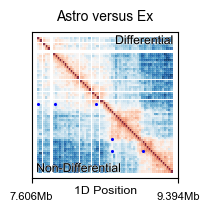

In [13]:
from utils.maps import pair_loop_map
diffloop = sf.tl.DiffLoop(adata_astro, oadata)
res = diffloop.diff_loops(loop_df[loop_df["final"]])
df = diffloop.to_bedpe(res, 0.1)
fig = pair_loop_map(adata_astro, oadata, df, "chr3")
fig.suptitle("Astro versus Ex", fontsize=10)
fig.savefig(os.path.join(out_dire, "Astro_Ex_Loop.pdf"), bbox_inches="tight")

In [14]:
df[["c1", "s1", "e1", "c2", "s2", "e2", "fdr"]]

,c1,s1,e1,c2,s2,e2,fdr
0,chr3,7675000,7700000,chr3,8475000,8500000,0.915455
1,chr3,7875000,7900000,chr3,8475000,8500000,0.915455
2,chr3,8375000,8400000,chr3,8475000,8500000,0.915455
3,chr3,8575000,8600000,chr3,8900000,8925000,0.915455
4,chr3,8575000,8600000,chr3,9050000,9075000,0.915455
5,chr3,8950000,8975000,chr3,9050000,9075000,0.243232


Found 4 differential loops, while 2 are not differential loops.


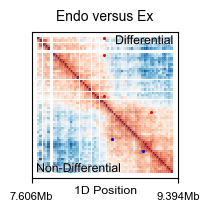

In [12]:
diffloop = sf.tl.DiffLoop(adata_endo, oadata)
res = diffloop.diff_loops(loop_df[loop_df["final"]])
df = diffloop.to_bedpe(res, 0.1)
fig = pair_loop_map(adata_endo, oadata, df, "chr3")
fig.suptitle("Endo versus Ex", fontsize=10)
fig.savefig(os.path.join(out_dire, "Endo_Ex_Loop.pdf"), bbox_inches="tight")

In [16]:
df[["c1", "s1", "e1", "c2", "s2", "e2", "fdr"]]

,c1,s1,e1,c2,s2,e2,fdr
0,chr3,7675000,7700000,chr3,8475000,8500000,0.041236
1,chr3,7875000,7900000,chr3,8475000,8500000,0.000067
2,chr3,8375000,8400000,chr3,8475000,8500000,0.014833
3,chr3,8575000,8600000,chr3,8900000,8925000,0.416674
4,chr3,8575000,8600000,chr3,9050000,9075000,0.037286
5,chr3,8950000,8975000,chr3,9050000,9075000,0.416674


Found 0 differential loops, while 6 are not differential loops.


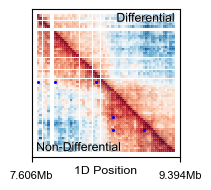

In [17]:
diffloop = sf.tl.DiffLoop(adata_astro, oadata)
res = diffloop.diff_loops(loop_df[loop_df["final"]])
df = diffloop.to_bedpe(res, 0.1)
fig = pair_loop_map(adata_endo, oadata, df, "chr3")
fig.savefig(os.path.join(out_dire, "Endo_Astro_Loop.pdf"), bbox_inches="tight")

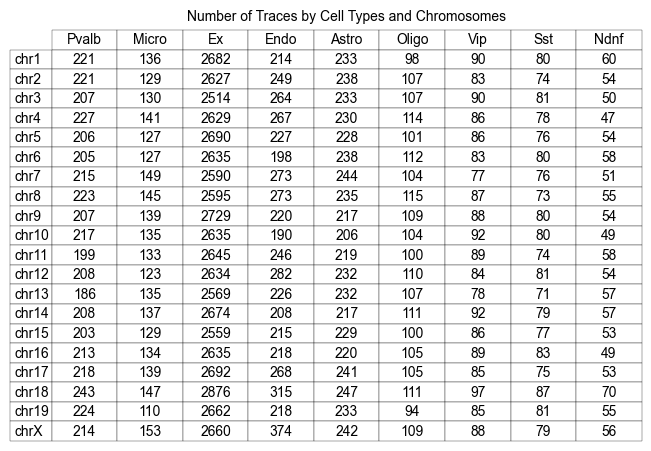

In [14]:
rows = []
for chr_id in loader.chr_ids:
    adata = loader.create_adata(chr_id)
    sf.pp.add_cell_type(adata, celldfs, "Cell_ID", "cluster label")
    adata.obs["cell_type"] = adata.obs["cluster label"].map(celltype_dict)
    d = Counter(adata.obs["cell_type"])
    d["Chrom"] = chr_id
    rows.append(d)
df = pd.DataFrame(rows).sort_values("Chrom").set_index("Chrom")
df = df.loc[[f"chr{i}" for i in range(1, 20)]+["chrX"]]
fig, ax = plt.subplots()
ax.axis("off")
ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, 
         cellLoc="center", loc="center")
ax.set_title("Number of Traces by Cell Types and Chromosomes", 
             y=1.02, fontsize=10)
out_fname = os.path.join(out_dire, "takei_science_count.pdf")
fig.savefig(out_fname, bbox_inches="tight")